In [1]:
# birdy client for communication with the server:
from birdy import WPSClient
# import birdy 

# handling files and folders
from os import path, listdir
from urllib import request
import time

# to display external png graphics in notebook: 
from IPython.display import Image
from IPython.core.display import HTML 

In [2]:
# on serverside :
# conda activate finch 
# finch start -c etc/custom.cfg 

fp_server = 'http://localhost:8093/wps'    # flyingpigeon
fp_i = WPSClient(fp_server, progress=True)
fp = WPSClient(fp_server)

finch_server = 'http://localhost:8092/wps'   # finch 
finch_i = WPSClient(url=finch_server, progress=True)
finch = WPSClient(finch_server)

In [29]:
# pr and tas files of bbox over Niger had been prepared
# how to prepare country subsets are explained here:
# https://github.com/nilshempelmann/NAP_Niger/blob/master/subset_polygon.ipynb
#
# Furthermore, biasadjustment had been performed: 
# https://github.com/nilshempelmann/NAP_Niger/blob/master/bias_adjustment.R

# read in the existing bias_adjusted tas files:
tas_path = '/home/nils/nap_niger/data/adjust/'
tas_files = [ tas_path+f for f in listdir(tas_path) if 'tasAdjust' in f]
tas_files.sort()

# read in the existing pr files (!!! not bias adjusted, so far !!!):
pr_path = '/home/nils/nap_niger/data/bbox/'
# lists all files stored in 'path'
pr_files = [ pr_path+f for f in listdir(pr_path) if 'pr_' in f]
pr_files.sort()

print(len(tas_files), len(pr_files) )


18 18


In [4]:
# Quick check of tas datasets ensemble in a plot:
out = fp_i.plot_spaghetti(tas_files)

In [5]:
Image(url= out.get()[0])

In [4]:
# prepare imput parameter 

pr_indices_path = path.join(pr_path,'indices/')
tas_indices_path = path.join(tas_path,'indices/')
# frequencies
freq=['YS','MS']

# precipitation indices
pr_indices = ['prcptot','rx1day','wetdays','cdd','cwd','sdii','max_n_day_precipitation_amount']
tas_indices = ['tg_mean']

## Claculation of indices:
manipulate the next code box and set the approriate indices with according input files and output information


In [44]:
out = finch_i.sdii(pr=pr_files, freq=freq[0]) #  tas=file2[0]
        
# NOTES:
# prcptot requires tas information, should be optional:
# https://github.com/bird-house/finch/issues/71

In [45]:
from metalink import download
indice_files = download.get(out.get()[2], path=pr_indices_path, segmented=False)

Metalink content-type detected.


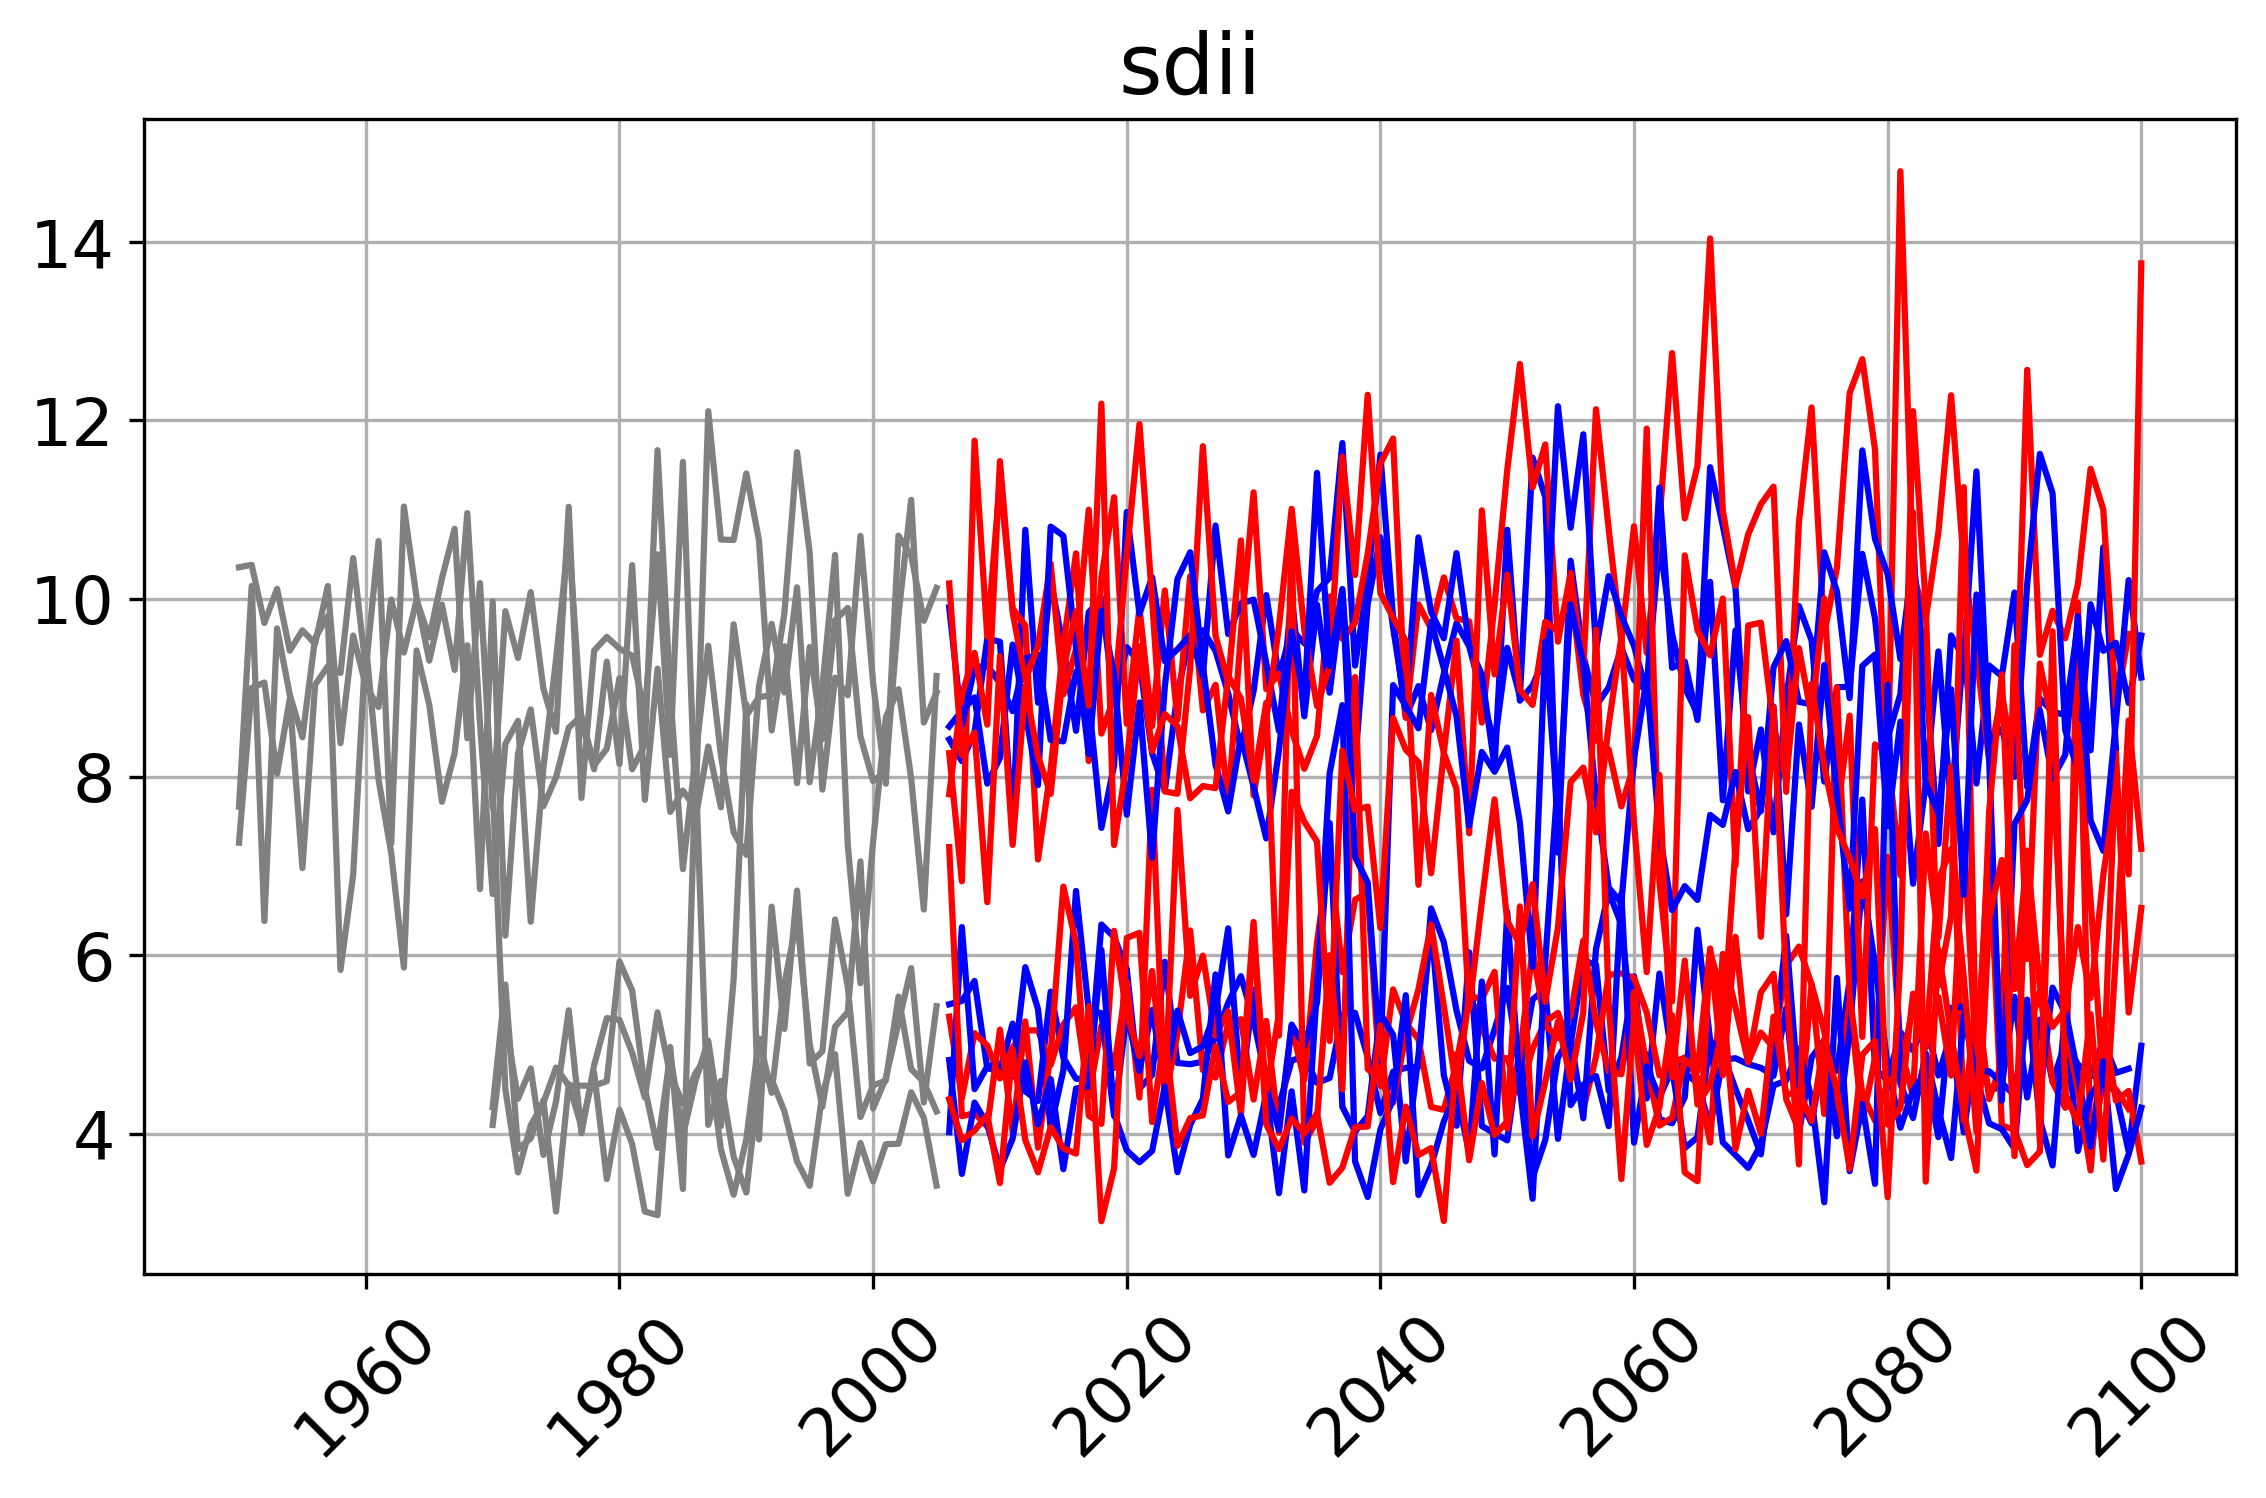

In [47]:
# Quick check of pr data in a plot:
indice = 'sdii'

out = fp_i.plot_spaghetti(indice_files, figsize='9,5',title=indice )
while out.getStatus() != 'ProcessSucceeded':
    time.sleep(1)
out_file = '/home/nils/nap_niger/pics/ts_spaghetti_{}.png'.format(indice)

request.urlretrieve(out.get()[0], out_file)
Image(out_file, width=400)

In [48]:
# subset polygon for the country  # tas_indices_path

indice_files = [path.join(pr_indices_path,f) for f in listdir(pr_indices_path) if indice in f]
indice_files

['/home/nils/nap_niger/data/bbox/indices/sdii_AFR-22_MPI-M-MPI-ESM-LR_rcp26_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20060101-21000101.nc',
 '/home/nils/nap_niger/data/bbox/indices/sdii_AFR-22_MOHC-HadGEM2-ES_rcp26_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20060101-20980101.nc',
 '/home/nils/nap_niger/data/bbox/indices/sdii_AFR-22_NCC-NorESM1-M_rcp26_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20060101-21000101.nc',
 '/home/nils/nap_niger/data/bbox/indices/sdii_AFR-22_MPI-M-MPI-ESM-LR_historical_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_19500101-20050101.nc',
 '/home/nils/nap_niger/data/bbox/indices/sdii_AFR-22_NCC-NorESM1-M_rcp85_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20060101-21000101.nc',
 '/home/nils/nap_niger/data/bbox/indices/sdii_AFR-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20060101-21000101.nc',
 '/home/nils/nap_niger/data/bbox/indices/sdii_AFR-22_NCC-NorESM1-M_historical_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_19500101-20050101.nc',
 '/home/nils/nap_niger/data/bbox/indices/sdii_AFR-22_MO

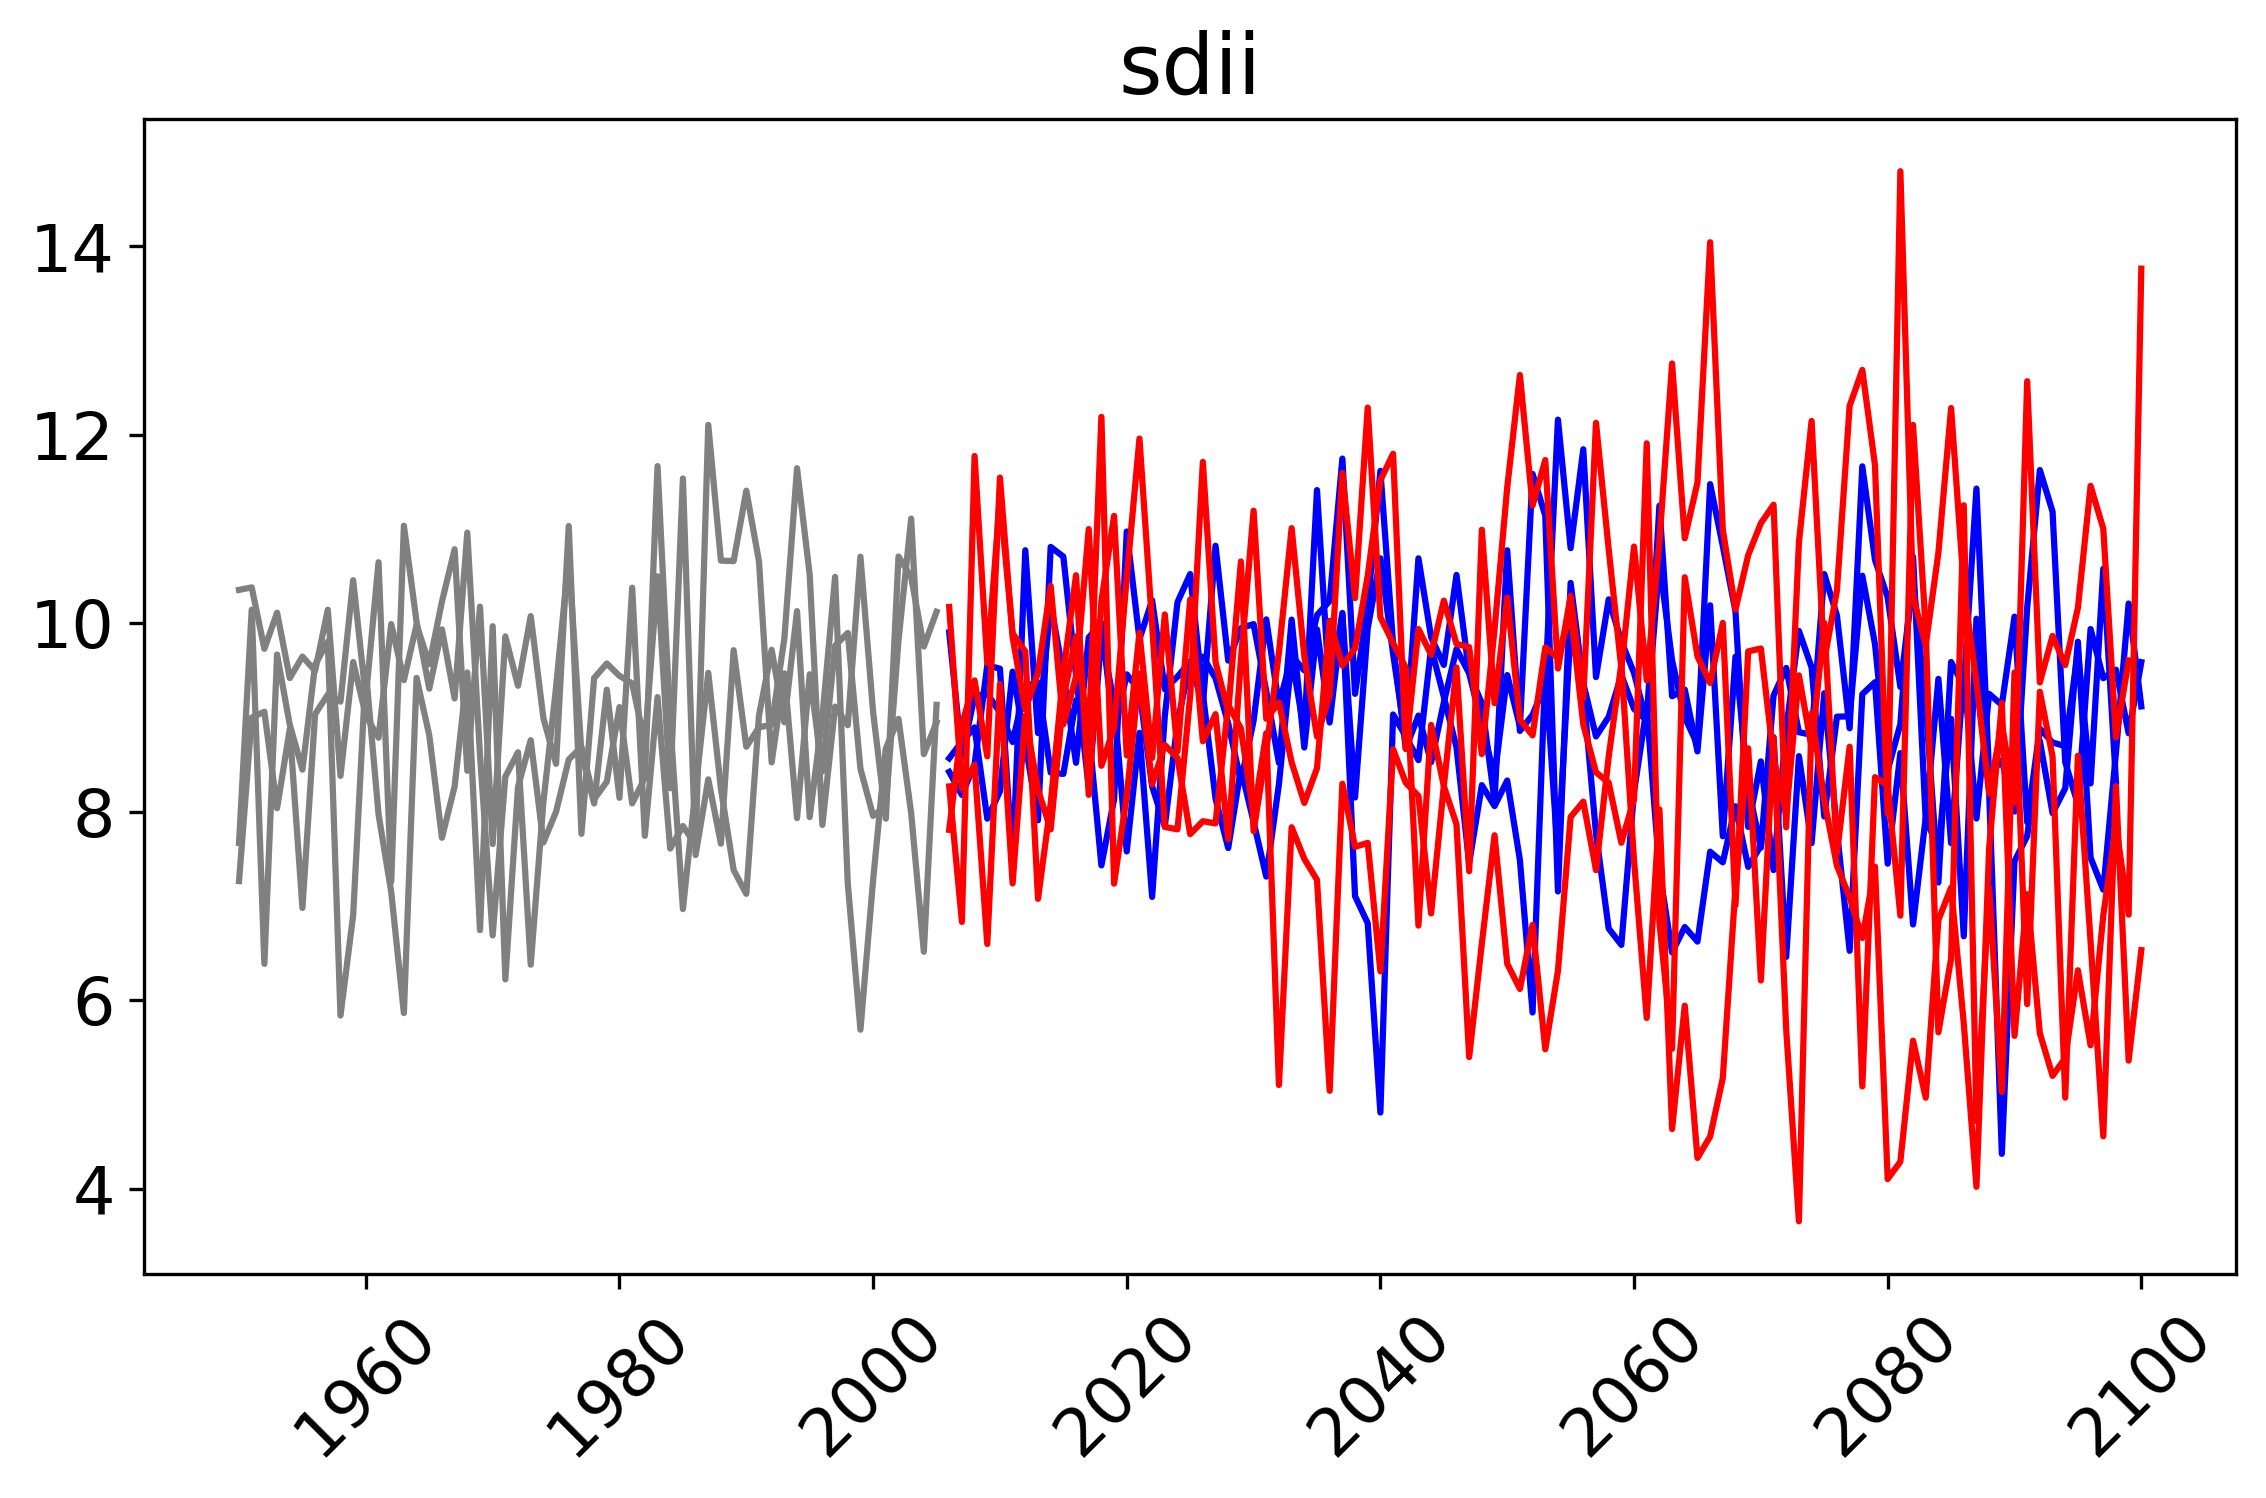

In [49]:
# Quick check of pr data in a plot:
out = fp_i.plot_spaghetti(resource=indice_files, figsize='9,5',title=indice )
while out.getStatus() != 'ProcessSucceeded':
    time.sleep(1)
out_file = '/home/nils/nap_niger/pics/ts_spaghetti_{}.png'.format(indice)

request.urlretrieve(out.get()[0], out_file)
Image(out_file, width=400)

In [14]:
for f in indice_files:
    out = fp.subset_countries(resource=f, region='NER')
#     while out.getStatus() != 'ProcessSucceeded':
#         time.sleep(1) # wait until the widget is 'Complete'
# url = out.get()[1]
# fn = path.basename(url)
# indice_file, _ = request.urlretrieve(url, path.join(tas_indices_path,fn))

 owslib.wps.WPSException : {'code': 'NoApplicableCode', 'locator': 'None', 'text': 'Process error: method=wps_subset_countries.py._handler, line=123, msg=Clipping failed: expected str, bytes or os.PathLike object, not NoneType'}
 owslib.wps.WPSException : {'code': 'NoApplicableCode', 'locator': 'None', 'text': 'Process error: method=wps_subset_countries.py._handler, line=123, msg=Clipping failed: expected str, bytes or os.PathLike object, not NoneType'}
 owslib.wps.WPSException : {'code': 'NoApplicableCode', 'locator': 'None', 'text': 'Process error: method=wps_subset_countries.py._handler, line=123, msg=Clipping failed: expected str, bytes or os.PathLike object, not NoneType'}
 owslib.wps.WPSException : {'code': 'NoApplicableCode', 'locator': 'None', 'text': 'Process error: method=wps_subset_countries.py._handler, line=123, msg=Clipping failed: expected str, bytes or os.PathLike object, not NoneType'}
 owslib.wps.WPSException : {'code': 'NoApplicableCode', 'locator': 'None', 'text': '

In [38]:
# indice_files = []

# for i, f  in enumerate(pr_files):
# #     # some indices requires pairs. To find corrsponding file:
# #     file2 = [t for t in tas_files if path.basename(f).strip('pr_') in t]
# #     if len(file2) == 1:
#     out = finch_i.max_n_day_precipitation_amount(pr=f, window=5, freq=freq[1]) #  tas=file2[0],
#     # wait until finch processed the file:
#     while out.getStatus() != 'ProcessSucceeded':
#         time.sleep(1)
#     filename = path.basename(f).replace('_day_', '_mon_').replace('pr_','max_5_day_precipitation_amount_')
#     url = out.get()[0]
#     indice_file, _ = request.urlretrieve(url, pr_indices_path+filename)
#     indice_files.append(indice_file)
#     print('Done for {}'.format(path.basename(indice_file)))
# #     else:
# #         print('no correspondent file for {} found'.format(path.basename(f)))
        
# print('**** Done *****')        
finch_i.max_n_day_precipitation_amount?
